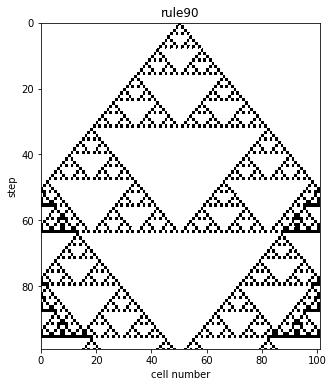

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
 
def ca_1d(l, t, rule, cell_i):
    cell= cell_i
    data= [cell]
    for i in range(t):
        cell_next= [0 for i in range(l)]
        for j in range(l):
            neighboringstate= cell[(j-1+l)%l]*4+cell[j]*2+cell[(j+1)%l]
            cell_next[j]= rule[neighboringstate]
        cell= cell_next
        data.append(cell)
    return(data)
L=101
T=100
SEED=100
rnd.seed(SEED)
RNO= 90
RULE= [(RNO>>i)&1 for i in range(8)]
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
cell_init[L//2]= 1
dataXY= ca_1d(L, T, RULE, cell_init)
fig= plt.figure(figsize=(5, 6))
ax= fig.add_subplot(1,1,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1,  cmap= plt.cm.binary)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("rule" + str(RNO))
plt.show()

In [159]:
#calcEntropy
import numpy as np
 
def calcEntropy(data):
    dic= {}
    for d in data:
        if d in dic:
            dic[d]= dic[d]+1
        else:
            dic[d]= 1
    probdist= np.array(list(dic.values()))/(float)(len(data))
    return(np.sum([-p * np.log2(p) for p in probdist]))


In [160]:
#calcJointEntropy
def calcJointEntropy(dataXY,RNO):
    dic = {}
    data_j= np.array(dataXY).transpose()[RNO]
    for k in range(len(data_j)-1):
        tup = tuple([data_j[k],data_j[k+1]])
        if tup in dic:
            dic[tup] = dic[tup]+1
        else:
            dic[tup] = 1
    probdist= np.array(list(dic.values()))/(float)(len(dataXY[0]))
    return(np.sum([-p * np.log2(p) for p in probdist]))

In [161]:
def calcMI(dataXY,RNO):
    data_j= np.array(dataXY).transpose()[RNO]
    data_X = data_j[:len(data_j)-1]
    data_Y = data_j[1:]
    MI = 0.0
    MI += calcEntropy(data_X)
    MI += calcEntropy(data_Y)
    MI -= calcJointEntropy(dataXY,RNO)
    if  MI < 0:
        MI =0
    return MI

In [162]:
def calcMIList(dataXY):
    lis = []
    for i in range(len(dataXY)):
        lis.append(calcMI(dataXY,i))
    return lis

In [163]:
def calcCAMI(dataXY):
    return np.sum(calcMIList(dataXY))/(len(dataXY))

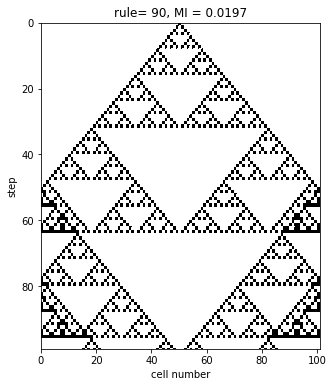

In [164]:
# 課題 2
L=101
T=100
SEED=100
rnd.seed(SEED)
 
RNO= 90
RULE= [(RNO>>i)&1 for i in range(8)]
 
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
cell_init[L//2]= 1
 

 
dataXY= ca_1d(L, T, RULE, cell_init)

MI = calcMI(dataXY,RNO)

fig= plt.figure(figsize=(5, 6))
ax= fig.add_subplot(1,1,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1,  cmap= plt.cm.binary)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("rule= " + str(RNO)+", MI = "+"{:.4f}".format(MI))
plt.show()



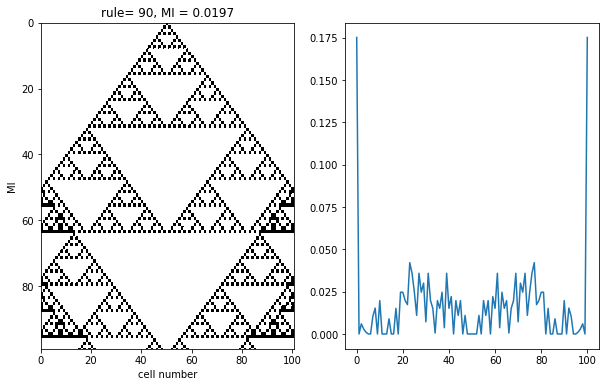

In [165]:
# 課題 3, 4 
L=101
T=100
SEED=100
rnd.seed(SEED)
 
RNO= 90
RULE= [(RNO>>i)&1 for i in range(8)]
 
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
cell_init[L//2]= 1
 

 
dataXY= ca_1d(L, T, RULE, cell_init)

MI = calcMI(dataXY,RNO)
MIList = calcMIList(dataXY)
cellnum = [i for i in range(101)]

fig= plt.figure(figsize=(10, 6))
ax= fig.add_subplot(1,2,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1,  cmap= plt.cm.binary)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("rule= " + str(RNO)+", MI = "+"{:.4f}".format(MI))

ax2= fig.add_subplot(1,2,2)
ax2.plot(cellnum,MIList)
ax.set_xlabel("cell number")
ax.set_ylabel("MI")

plt.show()



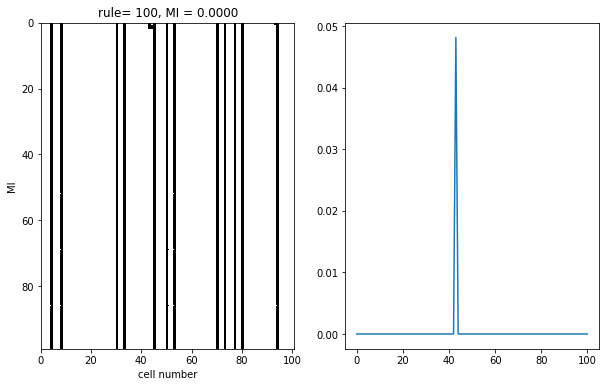

0.0004770138192649587


In [174]:
import random
# 課題 5 クラス1
L=101
T=100
SEED=100
rnd.seed(SEED)
 
RNO= 100
RULE= [(RNO>>i)&1 for i in range(8)]
 
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
cell_init[L//2]= 1
randint = random.uniform(0,100)
for i in range(int(randint)):
    cell_init[int(random.uniform(0,100))]= 1
 

 
dataXY= ca_1d(L, T, RULE, cell_init)

MI = calcMI(dataXY,RNO)
MIList = calcMIList(dataXY)
cellnum = [i for i in range(L)]

fig= plt.figure(figsize=(10, 6))
ax= fig.add_subplot(1,2,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1,  cmap= plt.cm.binary)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("rule= " + str(RNO)+", MI = "+"{:.4f}".format(MI))

ax2= fig.add_subplot(1,2,2)
ax2.plot(cellnum,MIList)
ax.set_xlabel("cell number")
ax.set_ylabel("MI")

plt.show()

print(calcCAMI(dataXY))



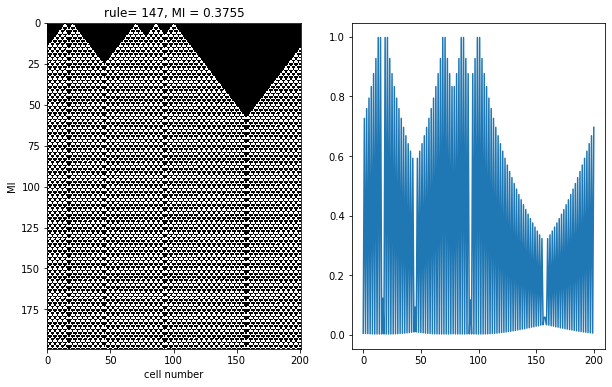

0.33213860422781627


In [168]:
import random
# 課題 5 クラス2
L=201
T=200
SEED=200
rnd.seed(SEED)
 
RNO= 147
RULE= [(RNO>>i)&1 for i in range(8)]
 
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
cell_init[L//2]= 1
randint = random.uniform(0,100)
for i in range(int(randint)):
    cell_init[int(random.uniform(0,100))]= 1
 

 
dataXY= ca_1d(L, T, RULE, cell_init)

MI = calcMI(dataXY,RNO)
MIList = calcMIList(dataXY)
cellnum = [i for i in range(L)]

fig= plt.figure(figsize=(10, 6))
ax= fig.add_subplot(1,2,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1,  cmap= plt.cm.binary)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("rule= " + str(RNO)+", MI = "+"{:.4f}".format(MI))

ax2= fig.add_subplot(1,2,2)
ax2.plot(cellnum,MIList)
ax.set_xlabel("cell number")
ax.set_ylabel("MI")

plt.show()

print(calcCAMI(dataXY))



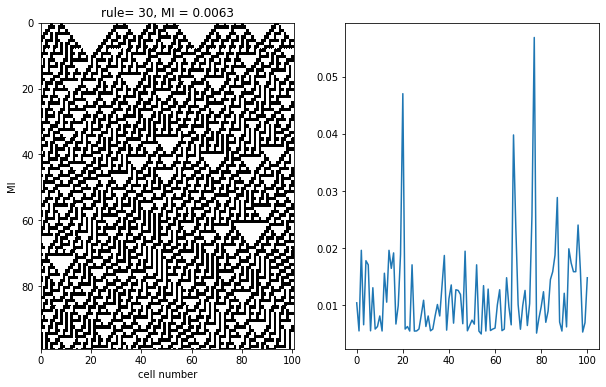

0.011973045401795732


In [153]:
import random
# 課題 5 クラス3
L=101
T=100
SEED=100
rnd.seed(SEED)
 
RNO= 30
RULE= [(RNO>>i)&1 for i in range(8)]
 
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
cell_init[L//2]= 1
randint = random.uniform(0,100)
for i in range(int(randint)):
    cell_init[int(random.uniform(0,100))]= 1
 

 
dataXY= ca_1d(L, T, RULE, cell_init)

MI = calcMI(dataXY,RNO)
MIList = calcMIList(dataXY)
cellnum = [i for i in range(L)]

fig= plt.figure(figsize=(10, 6))
ax= fig.add_subplot(1,2,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1,  cmap= plt.cm.binary)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("rule= " + str(RNO)+", MI = "+"{:.4f}".format(MI))

ax2= fig.add_subplot(1,2,2)
ax2.plot(cellnum,MIList)
ax.set_xlabel("cell number")
ax.set_ylabel("MI")

plt.show()

print(calcCAMI(dataXY))



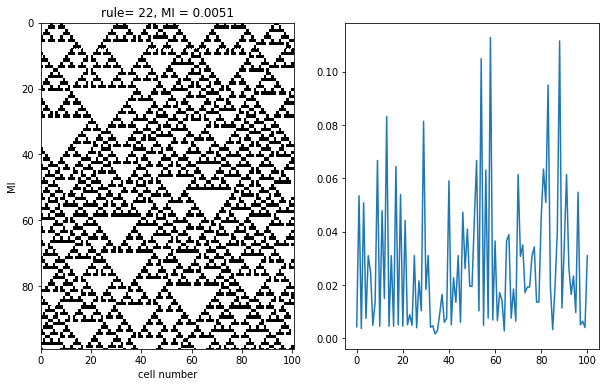

0.027726881728005946


In [157]:
import random
# 課題 5 クラス4
L=101
T=100
SEED=100
rnd.seed(SEED)
 
RNO= 22
RULE= [(RNO>>i)&1 for i in range(8)]
 
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
cell_init[L//2]= 1
randint = random.uniform(0,100)
for i in range(int(randint)):
    cell_init[int(random.uniform(0,100))]= 1
 

 
dataXY= ca_1d(L, T, RULE, cell_init)

MI = calcMI(dataXY,RNO)
MIList = calcMIList(dataXY)
cellnum = [i for i in range(L)]

fig= plt.figure(figsize=(10, 6))
ax= fig.add_subplot(1,2,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = 1,  cmap= plt.cm.binary)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("rule= " + str(RNO)+", MI = "+"{:.4f}".format(MI))

ax2= fig.add_subplot(1,2,2)
ax2.plot(cellnum,MIList)
ax.set_xlabel("cell number")
ax.set_ylabel("MI")

plt.show()

print(calcCAMI(dataXY))

